# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import matplotlib.animation as animation


def plot_results(f1, f2, num_points, epoch, trajectories, loss_history=None, loss_name="L2"):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')

    f1 = f1.detach().cpu().numpy()
    f2 = f2.detach().cpu().numpy()
    
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title(f"Loss {loss_name} Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

In [8]:
def anim(focus1, focus2, num_points, trajectories, loss_name="loss"):
    focus1 = focus1.cpu()
    focus2 = focus2.cpu()
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_title(f"Optimization with {loss_name.upper()}")
    ax.plot(focus1[0], focus1[1], 'ro', label='Focus 1')
    ax.plot(focus2[0], focus2[1], 'bo', label='Focus 2')

    scat = ax.scatter([], [], s=10, c='black', label='Points')
    ax.legend()

    def init():
        scat.set_offsets(np.empty((0, 2))) 
        return scat,

    def update(frame):
        current_positions = np.array([trajectories[i][frame] for i in range(num_points)])
        scat.set_offsets(current_positions)
        ax.set_title(f"{loss_name.upper()} – Epoch {frame}")
        return scat,

    num_frames = min(len(trajectories[0]), 200)  # Limit frames for performance
    ani = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, repeat=True)

    ani.save(f"{loss_name}_optimization.gif", writer='pillow', fps=20)
    plt.close(fig)
    # plt.show()

Working on cuda
TESTING LOSS_l0
Loss_l0 nie ma gradientu
Epoch 0: Loss l0 = 0.770000
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma gradientu
Loss_l0 nie ma 

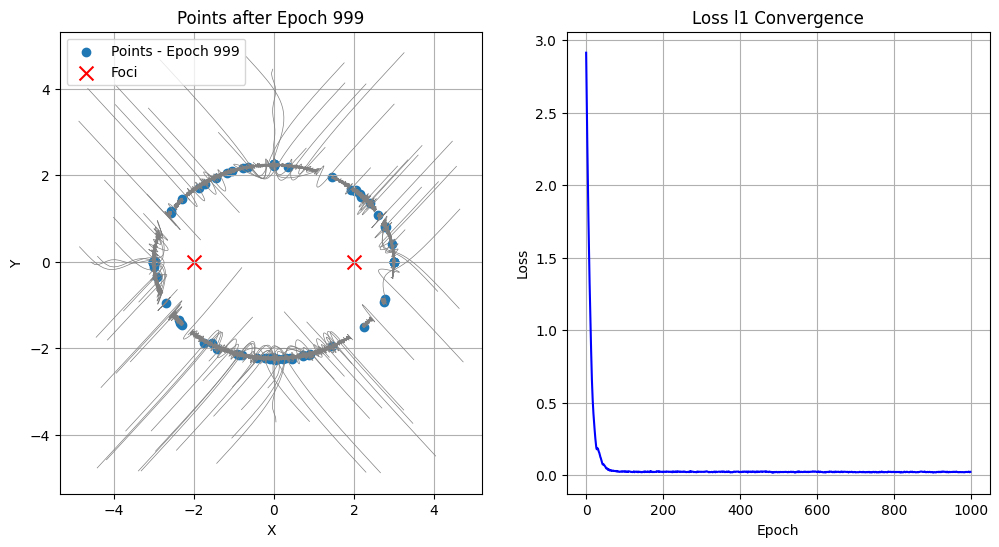

Elapsed time: 23.664852619171143 seconds
TESTING LOSS_l2
Epoch 0: Loss l2 = 11.241671
Epoch 100: Loss l2 = 0.000155
Epoch 200: Loss l2 = 0.000000
Epoch 300: Loss l2 = 0.000000
Epoch 400: Loss l2 = 0.000000
Epoch 500: Loss l2 = 0.000000
Epoch 600: Loss l2 = 0.000000
Epoch 700: Loss l2 = 0.000000
Epoch 800: Loss l2 = 0.000000
Epoch 900: Loss l2 = 0.000000


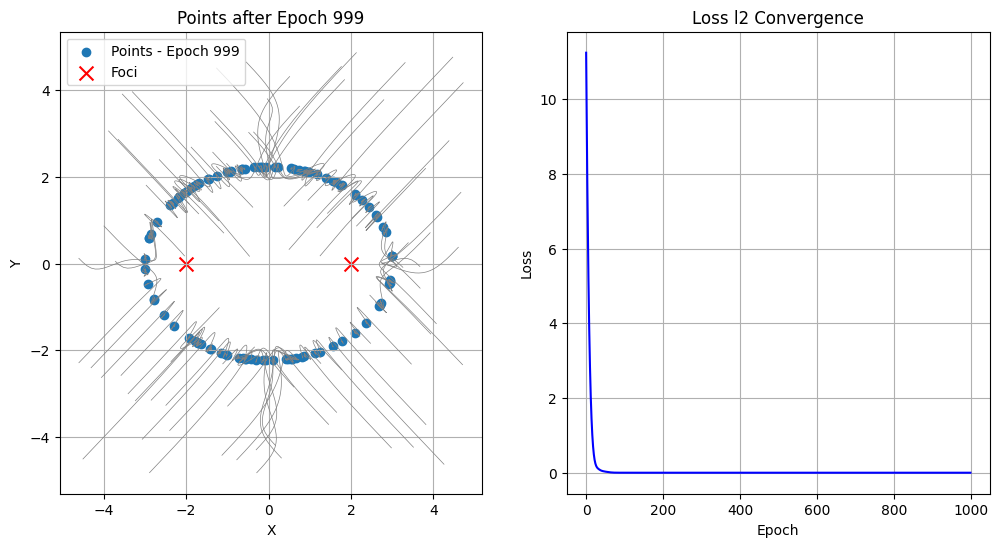

Elapsed time: 23.62651824951172 seconds
TESTING LOSS_inf
Epoch 0: Loss inf = 6.733395
Epoch 100: Loss inf = 2.851147
Epoch 200: Loss inf = 0.951166
Epoch 300: Loss inf = 0.562892
Epoch 400: Loss inf = 0.433400
Epoch 500: Loss inf = 0.364857
Epoch 600: Loss inf = 0.408871
Epoch 700: Loss inf = 0.349129
Epoch 800: Loss inf = 0.359051
Epoch 900: Loss inf = 0.414151


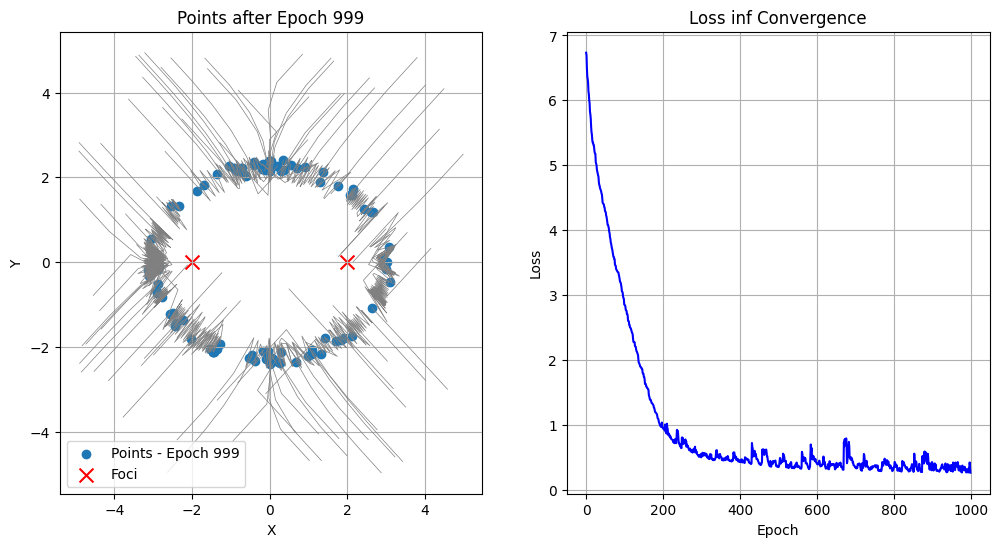

Elapsed time: 25.446362018585205 seconds


In [9]:
torch.manual_seed(42)
np.random.seed(42)

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

print(f"Working on {device}")

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0]).to(device)  # First focus
focus2 = torch.tensor([2.0, 0.0]).to(device)    # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

losses = {
            "l0":lambda eps: torch.mean((eps > 0).float()),
            "l1":lambda eps: torch.mean(torch.abs(eps)),
            "l2":lambda eps: torch.mean((eps) **2),
           "inf":lambda eps: torch.max(torch.abs(eps))
         }

# Training loop

for name, loss_fn in losses.items():
    # Initialize random 2D points from uniform distribution
    num_points = 100
    points = (torch.rand((num_points, 2)) * 10 - 5).to(device)   # Uniformly distributed in [-5, 5]
    points.requires_grad = True
    optimizer = torch.optim.Adam([points], lr=0.1)

    print(f"TESTING LOSS_{name}")
    num_epochs = 1000

    # Reset trajectories
    trajectories = [[] for _ in range(num_points)]
    loss_history = []
    start_time = time.time()


    for epoch in range(num_epochs):
        optimizer.zero_grad()

    
        dist1 = torch.norm(points - focus1, dim=1)
        dist2 = torch.norm(points - focus2, dim=1)

        # l_0, l_1 and l_infty - related loss
        eps = dist1 + dist2 - constant_sum
        loss = loss_fn(eps)

        try:
            loss.backward()
            optimizer.step()
        except RuntimeError:
            print(f"Loss_{name} nie ma gradientu")

        loss_history.append(loss.item())

        # Store current positions for tracking movement
        for i in range(num_points):
            trajectories[i].append(points[i].detach().cpu().clone().numpy())

        # Plot results every 10th epoch
        if epoch % 100 == 0:
            # plot_results(focus1, focus2, num_points, epoch, trajectories, loss_history)
            pass
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss {name} = {loss.item():.6f}")

    #Final plot
    if name != 'l0':
        plot_results(focus1, focus2, num_points, epoch, trajectories, loss_history, loss_name=name)
        anim(focus1, focus2, num_points, trajectories, loss_name=name)


    
    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f"Elapsed time: {elapsed_time} seconds")

# RESULTS

<p align="center">
  <img src="inf_optimization.gif" width="350"/>
  <img src="l1_optimization.gif" width="350"/>
  <img src="l2_optimization.gif" width="350"/>
</p>

- L infty: only one epsilon is max each time we calculate loss so gradient is also dependent on one variable and optimizer updates only one at a time.